<a href="https://colab.research.google.com/github/Atharva-Shah-2298/Trading-with-deep-learning/blob/main/Nifty_Pred_2D_CNN_LSTM_18_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import random
import functools
import logging
import os
import sys
import pickle
import time
import warnings
import pdb

from keras.models import load_model
import tempfile
import keras.models

# import FS_Final as fs

In [ ]:
import os
import keras
import itertools
import matplotlib.pyplot as plt
from math import sqrt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from datetime import datetime
from itertools import product
from functools import reduce

#Importing SKlearn libraries for data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_auc_score, mean_squared_error,r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import keras.backend as K
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, subtract, dot, MaxPool2D, Flatten, AvgPool2D
from keras.layers import Input, concatenate, merge
from keras.callbacks import Callback
from keras import initializers
from keras import models
from keras.layers import Bidirectional
from keras.layers import Reshape

from keras.layers import Lambda
# from keras.backend import slice

pd.set_option('display.max_columns', None)

In [ ]:
path = r'/content/drive/MyDrive/Nifty'

In [ ]:
nifty = pd.read_csv('/content/drive/MyDrive/Nifty/Nifty50_indicators_final.csv')

In [ ]:
nifty

,Date,Open,High,Low,Close,Adj Close,Volume,TREND,WILDERS_RSI,RSI,RSI_FAST_K,RSI_FAST_D,EXP_RSI,MACD,MACD_SIGN,MACD_HIST,MA_20,MA_50,MA_65,MA_200,BB_LOWER,BB_MIDDLE,BB_UPPER,PPO,PPO_SIGN,PPO_HIST,MOM,ROC,EMA_20,EMA_50,EMA_65,EMA_200,DPO
0,11-05-2011,5547.200195,5574.700195,5525.000000,5565.049805,5565.049805,0,-1,41.779763,41.779763,100.000000,97.397249,38.024471,-46.927202,-13.601502,-33.325700,5715.605005,5641.161992,5585.595388,5749.517000,5433.175896,5715.605005,5998.034114,-0.828075,-0.241940,-0.586134,-309.450195,-4.897766,5658.143016,5666.909600,5670.206615,5718.888241,-261.193080
1,12-05-2011,5537.799805,5572.500000,5476.299805,5486.149902,5486.149902,0,-1,37.089676,37.089676,0.000000,64.145615,29.800368,-54.136399,-21.708481,-32.427918,5700.627490,5644.813994,5586.986155,5749.702249,5403.278941,5700.627490,5997.976039,-0.957552,-0.385063,-0.572489,-382.250000,-6.772652,5641.762719,5659.818702,5664.617626,5716.214144,-326.921527
2,13-05-2011,5492.350098,5605.000000,5472.149902,5544.750000,5544.750000,0,-1,42.272914,42.272914,100.000000,66.666667,40.777351,-54.493040,-28.265393,-26.227647,5682.289990,5649.043994,5589.274617,5750.332998,5394.128197,5682.289990,5970.451784,-0.965237,-0.501097,-0.464139,-289.149902,-5.613244,5632.523413,5655.304807,5660.978003,5714.247098,-248.553571
3,16-05-2011,5541.700195,5541.799805,5487.649902,5499.000000,5499.000000,0,-1,39.534301,39.534301,47.164043,49.054681,35.742631,-57.801029,-34.172520,-23.628508,5666.012500,5648.577998,5592.143081,5750.674998,5375.067719,5666.012500,5956.957281,-1.025804,-0.606039,-0.419765,-286.450195,-6.294730,5619.806897,5649.173385,5656.060053,5711.781524,-276.549979
4,17-05-2011,5496.100098,5523.850098,5421.049805,5438.950195,5438.950195,0,-1,36.217691,36.217691,0.000000,49.054681,30.111920,-64.524353,-40.242887,-24.281467,5651.505005,5646.632998,5594.995395,5750.882000,5346.017779,5651.505005,5956.992230,-1.148078,-0.714447,-0.433632,-310.549805,-6.769909,5602.582449,5640.926983,5649.468586,5708.661039,-304.339077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,07-09-2020,11359.599610,11381.150390,11251.700200,11355.049810,11355.049810,560300,0,51.805126,51.805126,8.989415,13.620121,43.879644,102.642384,136.664017,-34.021633,11406.932470,11117.212010,10891.000060,10807.198280,11174.868110,11406.932470,11638.996840,0.906215,1.213208,-0.306992,42.849610,-0.266130,11379.902650,11074.539080,10945.526060,10768.307830,11.699781
2279,08-09-2020,11378.549810,11437.250000,11290.450200,11317.349610,11317.349610,572200,0,50.030091,50.030091,0.000000,2.996472,40.975116,86.122224,126.555658,-40.433435,11406.674950,11137.517010,10910.549280,10803.789530,11174.225270,11406.674950,11639.124630,0.760407,1.122648,-0.362241,-54.250000,-0.798103,11373.945220,11084.061070,10956.793440,10773.770940,-50.657576
2280,09-09-2020,11218.599610,11298.150390,11185.150390,11278.000000,11278.000000,728900,0,48.174703,48.174703,0.000000,2.996472,37.949827,69.058628,115.056252,-45.997625,11405.154930,11154.476020,10928.423890,10800.337530,11169.775490,11405.154930,11640.534380,0.609936,1.020105,-0.410169,-188.450200,-0.302330,11364.807580,11091.666510,10966.526970,10778.788140,-116.967844
2281,10-09-2020,11363.299810,11464.049810,11327.400390,11449.250000,11449.250000,679400,0,55.848701,55.848701,100.000000,33.333333,54.732787,68.563689,105.757740,-37.194051,11412.594920,11172.427010,10952.227740,10798.011770,11181.557420,11412.594920,11643.632420,0.605062,0.937097,-0.332035,-23.000000,0.682845,11372.849710,11105.689400,10981.154940,10785.459400,49.639299


In [ ]:
shanghai = pd.read_csv(os.path.join(path,'000001.SS.csv'))

In [ ]:
shanghai["shanghai"]=shanghai["Close"]
shanghai.drop(columns=["Open","High","Low","Adj Close","Volume","Close"],inplace=True)


In [ ]:
shanghai.head()

,Date,shanghai
0,2011-04-19,2999.041016
1,2011-04-20,3007.037109
2,2011-04-21,3026.666992
3,2011-04-22,3010.517090
4,2011-04-25,2964.950928


In [ ]:
oneyear = pd.read_csv("/content/drive/MyDrive/Nifty/1.csv")

In [ ]:
fiveyear = pd.read_csv("/content/drive/MyDrive/Nifty/5.csv")

In [ ]:

tenyear = pd.read_csv("/content/drive/MyDrive/Nifty/10.csv")

In [ ]:
threemonth = pd.read_csv("/content/drive/MyDrive/Nifty/0.3.csv")

In [ ]:

brazil=pd.read_csv("/content/drive/MyDrive/Nifty/brazil.csv")

In [ ]:
brazil["brazil"]=brazil["Close"]
brazil.drop(columns=["Open","High","Low","Adj Close","Volume","Close"],inplace=True)


In [ ]:
brazil

,Date,brazil
0,2010-04-19,69098.0
1,2010-04-20,69318.0
2,2010-04-22,69386.0
3,2010-04-23,69509.0
4,2010-04-26,68872.0
...,...,...
2723,2021-04-12,118812.0
2724,2021-04-13,119297.0
2725,2021-04-14,120295.0
2726,2021-04-15,120701.0


In [ ]:
exrates=pd.read_csv("/content/drive/MyDrive/Nifty/exrates.csv")

In [ ]:
exrates.head()

,Date,INRcad,INRcny,INRsgd,INRhkd,INRaud,INRjpy,INRusd,INReur
0,18 Apr 2021,59.5459,11.4175,55.8420,9.5796,57.7240,0.6845,74.4498,89.2355
1,17 Apr 2021,59.5459,11.4175,55.8420,9.5796,57.7240,0.6845,74.4498,89.2355
2,16 Apr 2021,59.5459,11.4175,55.8420,9.5796,57.7240,0.6845,74.4498,89.2355
3,15 Apr 2021,60.0475,11.4939,56.2170,9.6577,58.1311,0.6900,75.0217,89.8010
4,14 Apr 2021,59.7850,11.4955,56.1526,9.6683,57.7296,0.6893,75.0861,89.8330


In [ ]:
exrates['Date'] = pd.to_datetime(exrates['Date'], infer_datetime_format=True)

In [ ]:
gold=pd.read_csv("/content/drive/MyDrive/Nifty/gold.csv")

In [ ]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 19, 2021","1,787.75","1,777.30","1,789.20","1,773.45",-,0.59%
1,"Apr 18, 2021","1,777.35","1,777.65","1,778.85","1,775.55",-,-0.09%
2,"Apr 16, 2021","1,779.00","1,770.40","1,779.50","1,770.10",0.63K,0.77%
3,"Apr 15, 2021","1,765.40","1,740.10","1,767.90","1,740.10",0.37K,1.76%
4,"Apr 14, 2021","1,734.90","1,741.30","1,745.90","1,732.70",1.04K,-0.65%


In [ ]:
gold["gold"]=gold["Price"]

In [ ]:
gold.drop(columns=["Price","Open","High","Low","Vol.","Change %"],inplace=True)

In [ ]:
nasdaq=pd.read_csv("/content/drive/MyDrive/Nifty/nasdaq.csv")

In [ ]:
silver=pd.read_csv("/content/drive/MyDrive/Nifty/silver.csv")

In [ ]:
nasdaq["nasdaq"]=nasdaq["Close"]
nasdaq.drop(columns=["Open","High","Low","Adj Close","Volume","Close"],inplace=True)


In [ ]:
markets1=pd.merge(nasdaq,brazil, how="outer",on="Date")

In [ ]:
markets=pd.merge(markets1,shanghai, how="outer", on="Date")

In [ ]:
markets.isna().sum()

Date          0
nasdaq       91
brazil      143
shanghai    430
dtype: int64

In [ ]:
oneyear["1y"]=oneyear.Price

In [ ]:
oneyear.drop(columns=["Open","High","Low","Change %","Price"],axis=1,inplace=True)

In [ ]:
fiveyear["5y"]=fiveyear.Price

In [ ]:
fiveyear.drop(columns=["Open","High","Low","Change %","Price"],axis=1,inplace=True)

In [ ]:
tenyear["10y"]=tenyear.Price

In [ ]:
tenyear.drop(columns=["Open","High","Low","Change %","Price"],axis=1,inplace=True)

In [ ]:
threemonth["0.3m"]=threemonth.Price

In [ ]:
threemonth.drop(columns=["Open","High","Low","Change %","Price"],axis=1,inplace=True)

In [ ]:
bond1=pd.merge(oneyear,threemonth,on='Date',how='inner')

In [ ]:
bond2=pd.merge(fiveyear,tenyear,on='Date',how="inner")

In [ ]:
bond=pd.merge(bond1,bond2,on="Date",how="inner")

In [ ]:
bond.head()

,Date,1y,0.3m,5y,10y
0,"Apr 19, 2021",3.933,3.34,5.549,6.075
1,"Apr 16, 2021",3.918,3.34,5.590,6.088
2,"Apr 15, 2021",3.928,3.34,5.637,6.126
3,"Apr 12, 2021",4.208,3.35,5.589,6.011
4,"Apr 09, 2021",3.987,3.34,5.583,6.017


In [ ]:
nifty.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,TREND,WILDERS_RSI,RSI,RSI_FAST_K,RSI_FAST_D,EXP_RSI,MACD,MACD_SIGN,MACD_HIST,MA_20,MA_50,MA_65,MA_200,BB_LOWER,BB_MIDDLE,BB_UPPER,PPO,PPO_SIGN,PPO_HIST,MOM,ROC,EMA_20,EMA_50,EMA_65,EMA_200,DPO
0,11-05-2011,5547.200195,5574.700195,5525.000000,5565.049805,5565.049805,0,-1,41.779763,41.779763,100.0,97.397249,38.024471,-46.927202,-13.601502,-33.325700,5715.605005,5641.161992,5585.595388,5749.517000,5433.175896,5715.605005,5998.034114,-0.828075,-0.241940,-0.586134,-309.450195,-4.897766,5658.143016,5666.909600,5670.206615,5718.888241,-261.193080
1,12-05-2011,5537.799805,5572.500000,5476.299805,5486.149902,5486.149902,0,-1,37.089676,37.089676,0.0,64.145615,29.800368,-54.136399,-21.708481,-32.427918,5700.627490,5644.813994,5586.986155,5749.702249,5403.278941,5700.627490,5997.976039,-0.957552,-0.385063,-0.572489,-382.250000,-6.772652,5641.762719,5659.818702,5664.617626,5716.214144,-326.921527


In [ ]:
nifty['Date'] = pd.to_datetime(nifty['Date'], format="%d-%m-%Y")
nifty.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,TREND,WILDERS_RSI,RSI,RSI_FAST_K,RSI_FAST_D,EXP_RSI,MACD,MACD_SIGN,MACD_HIST,MA_20,MA_50,MA_65,MA_200,BB_LOWER,BB_MIDDLE,BB_UPPER,PPO,PPO_SIGN,PPO_HIST,MOM,ROC,EMA_20,EMA_50,EMA_65,EMA_200,DPO
0,2011-05-11,5547.200195,5574.700195,5525.000000,5565.049805,5565.049805,0,-1,41.779763,41.779763,100.0,97.397249,38.024471,-46.927202,-13.601502,-33.325700,5715.605005,5641.161992,5585.595388,5749.517000,5433.175896,5715.605005,5998.034114,-0.828075,-0.241940,-0.586134,-309.450195,-4.897766,5658.143016,5666.909600,5670.206615,5718.888241,-261.193080
1,2011-05-12,5537.799805,5572.500000,5476.299805,5486.149902,5486.149902,0,-1,37.089676,37.089676,0.0,64.145615,29.800368,-54.136399,-21.708481,-32.427918,5700.627490,5644.813994,5586.986155,5749.702249,5403.278941,5700.627490,5997.976039,-0.957552,-0.385063,-0.572489,-382.250000,-6.772652,5641.762719,5659.818702,5664.617626,5716.214144,-326.921527


In [ ]:
bond['Date'] = pd.to_datetime(bond['Date'], infer_datetime_format=True)

In [ ]:
nifty.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
TREND                   int64
WILDERS_RSI           float64
RSI                   float64
RSI_FAST_K            float64
RSI_FAST_D            float64
EXP_RSI               float64
MACD                  float64
MACD_SIGN             float64
MACD_HIST             float64
MA_20                 float64
MA_50                 float64
MA_65                 float64
MA_200                float64
BB_LOWER              float64
BB_MIDDLE             float64
BB_UPPER              float64
PPO                   float64
PPO_SIGN              float64
PPO_HIST              float64
MOM                   float64
ROC                   float64
EMA_20                float64
EMA_50                float64
EMA_65                float64
EMA_200               float64
DPO                   float64
dtype: obj

In [ ]:
nifty=nifty.merge(bond,how="left",on="Date")

In [ ]:
markets['Date'] = pd.to_datetime(markets['Date'], infer_datetime_format=True)

In [ ]:
gold["Date"]=pd.to_datetime(gold["Date"],infer_datetime_format=True)

In [ ]:
gold["gold"]=gold["gold"].str.replace(",","").astype(float)

In [ ]:
nifty=nifty.merge(markets,how="left",on="Date")

In [ ]:
 nifty=nifty.merge(gold,how="left",on="Date")

In [ ]:
nifty=nifty.merge(exrates,how='left',on="Date")

In [ ]:
# nifty.isna().sum()

In [ ]:
nifty.fillna(method='bfill', axis=0,inplace=True)

In [ ]:
# nifty.isna().sum()

In [ ]:
# nifty['INDEX'] = 'nifty'

In [ ]:
# df_master = pd.concat([nifty,banknifty,it,pharma ,fin ,auto , metal , energy ,realty,fmcg ,infra ,media ,psubank, pse])
# df_master = pd.concat([nifty,banknifty,it])
df_master = nifty.copy()
# df_master.INDEX.unique()

In [ ]:
# index = pd.unique(df_master.INDEX)
cols_list = list(nifty.columns)
date_list = list(pd.unique(nifty.Date))
# for i in

In [ ]:
Y = nifty.copy()
Y.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'TREND',
       'WILDERS_RSI', 'RSI', 'RSI_FAST_K', 'RSI_FAST_D', 'EXP_RSI', 'MACD',
       'MACD_SIGN', 'MACD_HIST', 'MA_20', 'MA_50', 'MA_65', 'MA_200',
       'BB_LOWER', 'BB_MIDDLE', 'BB_UPPER', 'PPO', 'PPO_SIGN', 'PPO_HIST',
       'MOM', 'ROC', 'EMA_20', 'EMA_50', 'EMA_65', 'EMA_200', 'DPO', '1y',
       '0.3m', '5y', '10y', 'nasdaq', 'brazil', 'shanghai', 'gold', 'INRcad',
       'INRcny', 'INRsgd', 'INRhkd', 'INRaud', 'INRjpy', 'INRusd', 'INReur'],
      dtype='object')

In [ ]:
Y = Y[['Date', 'Close']]
Y.head(2)

,Date,Close
0,2011-05-11,5565.049805
1,2011-05-12,5486.149902


In [ ]:
# df_master.dropna(axis = 0, inplace = True)
# df_master.isna().sum(), len(df_master.columns)
df_master.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,TREND,WILDERS_RSI,RSI,RSI_FAST_K,RSI_FAST_D,EXP_RSI,MACD,MACD_SIGN,MACD_HIST,MA_20,MA_50,MA_65,MA_200,BB_LOWER,BB_MIDDLE,BB_UPPER,PPO,PPO_SIGN,PPO_HIST,MOM,ROC,EMA_20,EMA_50,EMA_65,EMA_200,DPO,1y,0.3m,5y,10y,nasdaq,brazil,shanghai,gold,INRcad,INRcny,INRsgd,INRhkd,INRaud,INRjpy,INRusd,INReur
0,2011-05-11,5547.200195,5574.700195,5525.000000,5565.049805,5565.049805,0,-1,41.779763,41.779763,100.0,97.397249,38.024471,-46.927202,-13.601502,-33.325700,5715.605005,5641.161992,5585.595388,5749.517000,5433.175896,5715.605005,5998.034114,-0.828075,-0.241940,-0.586134,-309.450195,-4.897766,5658.143016,5666.909600,5670.206615,5718.888241,-261.193080,8.158,8.05,8.408,8.292,2845.060059,63776.0,2883.419922,1501.1,46.8353,6.8836,36.3234,5.7509,48.4112,0.5509,44.6953,64.169
1,2011-05-12,5537.799805,5572.500000,5476.299805,5486.149902,5486.149902,0,-1,37.089676,37.089676,0.0,64.145615,29.800368,-54.136399,-21.708481,-32.427918,5700.627490,5644.813994,5586.986155,5749.702249,5403.278941,5700.627490,5997.976039,-0.957552,-0.385063,-0.572489,-382.250000,-6.772652,5641.762719,5659.818702,5664.617626,5716.214144,-326.921527,8.116,8.00,8.367,8.212,2863.040039,64003.0,2844.083008,1506.6,46.5636,6.9239,36.1764,5.7890,47.7721,0.5560,44.9975,63.685


In [ ]:
index_split = int(0.7 *len(df_master))

df_master_train = df_master[:index_split]
df_master_test = df_master[index_split:]
# df_master[df_master['Date'] > '2017-11-27']
len(df_master_train)/ len(df_master), len(df_master_test)/ len(df_master)

(0.6999561979851073, 0.30004380201489267)

In [ ]:
df_master_train.to_excel('train_data.xlsx')

In [ ]:
df_master_test.to_excel('test.xlsx')

In [ ]:
len(df_master)

2283

In [ ]:
# df_master.iloc[int(0.7 *len(df_master))]

In [ ]:
df_master.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,TREND,WILDERS_RSI,RSI,RSI_FAST_K,RSI_FAST_D,EXP_RSI,MACD,MACD_SIGN,MACD_HIST,MA_20,MA_50,MA_65,MA_200,BB_LOWER,BB_MIDDLE,BB_UPPER,PPO,PPO_SIGN,PPO_HIST,MOM,ROC,EMA_20,EMA_50,EMA_65,EMA_200,DPO,1y,0.3m,5y,10y,nasdaq,brazil,shanghai,gold,INRcad,INRcny,INRsgd,INRhkd,INRaud,INRjpy,INRusd,INReur
0,2011-05-11,5547.200195,5574.700195,5525.000000,5565.049805,5565.049805,0,-1,41.779763,41.779763,100.0,97.397249,38.024471,-46.927202,-13.601502,-33.325700,5715.605005,5641.161992,5585.595388,5749.517000,5433.175896,5715.605005,5998.034114,-0.828075,-0.241940,-0.586134,-309.450195,-4.897766,5658.143016,5666.909600,5670.206615,5718.888241,-261.193080,8.158,8.05,8.408,8.292,2845.060059,63776.0,2883.419922,1501.1,46.8353,6.8836,36.3234,5.7509,48.4112,0.5509,44.6953,64.169
1,2011-05-12,5537.799805,5572.500000,5476.299805,5486.149902,5486.149902,0,-1,37.089676,37.089676,0.0,64.145615,29.800368,-54.136399,-21.708481,-32.427918,5700.627490,5644.813994,5586.986155,5749.702249,5403.278941,5700.627490,5997.976039,-0.957552,-0.385063,-0.572489,-382.250000,-6.772652,5641.762719,5659.818702,5664.617626,5716.214144,-326.921527,8.116,8.00,8.367,8.212,2863.040039,64003.0,2844.083008,1506.6,46.5636,6.9239,36.1764,5.7890,47.7721,0.5560,44.9975,63.685


In [ ]:
X_data_array_train = []
Date_list_train = []
columns_to_drop = ['Date']
for i in df_master_train.groupby(by=['Date']):
    Date_list_train.append(i[0])
    temp_data_train = i[1].drop(columns = columns_to_drop)
    X_data_array_train.append(np.array(temp_data_train.values))
X_data_array_train = np.array(X_data_array_train)

X_data_array_train.shape, len(Date_list_train)

((1598, 1, 48), 1598)

In [ ]:
X_data_array_test = []
Date_list_test = []
columns_to_drop = ['Date']
for i in df_master_test.groupby(by=['Date']):
    Date_list_test.append(i[0])
    temp_data_test = i[1].drop(columns = columns_to_drop)
    X_data_array_test.append(np.array(temp_data_test.values))
X_data_array_test = np.array(X_data_array_test)

X_data_array_test.shape, len(Date_list_test)

((685, 1, 48), 685)

In [ ]:
1598 + 685

2283

In [ ]:
# X_data_array = X_data_array.reshape((X_data_array.shape[0]), X_data_array.shape[2])

X_data_array_train = X_data_array_train.reshape((X_data_array_train.shape[0]), X_data_array_train.shape[2])
X_data_array_test = X_data_array_test.reshape((X_data_array_test.shape[0]), X_data_array_test.shape[2])

In [ ]:
# [i[0] for i in temp_data.values]

In [ ]:
# X_data_array

In [ ]:
X_final_train = []
Y_final_train = []
for i in range(len(Date_list_train)-20):
    temp_X_train = X_data_array_train[i:i+20,:]
#     print(temp_X.shape)
    X_final_train.append(temp_X_train)
    temp_y_train = X_data_array_train[i+20,4]
    Y_final_train.append(temp_y_train)
X_final_train = np.array(X_final_train)
Y_final_train = np.array(Y_final_train)

In [ ]:
X_final_test = []
Y_final_test = []
for i in range(len(Date_list_test)-20):
    temp_X_test = X_data_array_test[i:i+20,:]
#     print(temp_X.shape)
    X_final_test.append(temp_X_test)
    temp_y_test = X_data_array_test[i+20,4]
    Y_final_test.append(temp_y_test)
X_final_test = np.array(X_final_test)
Y_final_test = np.array(Y_final_test)

In [ ]:
# X_final = np.transpose(X_final, (0, 2, 1))

In [ ]:
# Y_final_test

In [ ]:
X_final_train.shape, Y_final_train.shape

((1578, 20, 48), (1578,))

In [ ]:
X_final_test.shape, Y_final_test.shape

((665, 20, 48), (665,))

In [ ]:
Y_final_train = Y_final_train.reshape((Y_final_train.shape[0]), 1, 1)
X_final_train = X_final_train.reshape((X_final_train.shape[0]), X_final_train.shape[1],X_final_train.shape[2], 1)

Y_final_train = Y_final_train.reshape((Y_final_train.shape[0]), 1, 1)
X_final_train = X_final_train.reshape((X_final_train.shape[0]), X_final_train.shape[1],X_final_train.shape[2], 1)


X_final_train.shape, Y_final_train.shape

((1578, 20, 48, 1), (1578, 1, 1))

In [ ]:
Y_final_test = Y_final_test.reshape((Y_final_test.shape[0]), 1, 1)
X_final_test = X_final_test.reshape((X_final_test.shape[0]), X_final_test.shape[1],X_final_test.shape[2], 1)

Y_final_test = Y_final_test.reshape((Y_final_test.shape[0]), 1, 1)
X_final_test = X_final_test.reshape((X_final_test.shape[0]), X_final_test.shape[1],X_final_test.shape[2], 1)


X_final_test.shape, Y_final_test.shape

((665, 20, 48, 1), (665, 1, 1))

In [ ]:
Y_final_train

array([[[ 5521.049805]],

       [[ 5485.799805]],

       [[ 5482.799805]],

       ...,

       [[10342.29981 ]],

       [[10348.75    ]],

       [[10389.7002  ]]])

In [ ]:
# X_final_train

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from keras.layers import LSTM, Embedding, ConvLSTM2D
from keras.layers import Bidirectional, GlobalMaxPool1D

In [ ]:
X_final_train.shape

(1578, 20, 48, 1)

# Model Architecture

In [ ]:
input_shape = (X_final_train.shape[1],X_final_train.shape[2], X_final_train.shape[3])
input_shape

(20, 48, 1)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
# X_final = np.asarray(X_final).astype('float32')

In [ ]:
# input layers for seq_1 and seq_2
input_seq_1 = Input(shape= input_shape)

conv_3_6 = Conv2D(1,kernel_size=(1,48), strides= 1, padding='valid', activation='relu', name ="3_6_convolution", kernel_initializer='glorot_uniform')
x1 = conv_3_6(input_seq_1)

x1.shape

# conv_4_6 = Conv2D(1,(1,1), strides= 1, padding='valid', activation='relu', name ="4_6_convolution")
# x1 = conv_4_6(x1)

# conv_5_6 = Conv2D(1, (1,1), strides= 1, padding='valid', activation='relu', name ="5_6_convolution")
# x1 = conv_5_6(x1)

# conv_5_6 = Conv2D(1, (1,1), strides= 1, padding='valid', activation='relu', name ="6_6_convolution")
# x1 = conv_5_6(x1)

# x1 = TimeDistributed(Dense(1, name = "Dense_1_2", activation = "relu"))(x1)
# x1 = Dropout(0.1)(x1)
# xdense1 = TimeDistributed(Dense(256, name = "Dense_1_3", activation = "relu"))(xdense1)
# xdense1= Dropout(0.1)(xdense1)





TensorShape([None, 20, 1, 1])

In [ ]:

reshape_1 = tf.keras.layers.Reshape((1, 20),input_shape=(20,1,1))
# x1 = Flatten(name = "x1_2_2")(x1)
x1 = reshape_1(x1)

lstm_1_1 = Bidirectional(LSTM(units=256, return_sequences=True, activation='relu',
                              kernel_regularizer=regularizers.l2(1e-2), name ="1_1_LSTM"))
x1 = lstm_1_1(x1)

lstm_1_2 = Bidirectional(LSTM(units=64, return_sequences=True, activation='relu',
                              kernel_regularizer=regularizers.l2(1e-2), name ="1_2_LSTM"))
x1 = lstm_1_2(x1)

lstm_1_3 = Bidirectional(LSTM(units=32, return_sequences=True, activation='relu',
                              kernel_regularizer=regularizers.l2(1e-2), name ="1_3_LSTM"))
x1 = lstm_1_3(x1)



# lstm1_2 = ConvLSTM2D(64, return_sequences=True, kernel_size=(2,1))
# lstm2_2 = ConvLSTM2D(32, return_sequences=True, kernel_size=(1,1))
# # lstm3 = LSTM(16, return_sequences=True, input_shape=(97, 32))
# # lstm4 = LSTM(8, return_sequences=True, input_shape=(97, 16))
# # lstm5 = LSTM(4, return_sequences=True, input_shape=(80, 8))

# x1 = lstm1_2(x1)
# x1 = lstm2_2(x1)
# # x1_2_2 = Flatten(name = "x1_2_2")(x1_2_2)

# xdense1 = TimeDistributed(Dense(1024, name = "Dense_1_1", activation = "relu"))(x1)
xdense1 = TimeDistributed(Dense(512, name = "Dense_1_2", activation = "relu"))(x1)
xdense1 = Dropout(0.1)(xdense1)
xdense1 = TimeDistributed(Dense(256, name = "Dense_1_3", activation = "relu"))(xdense1)
xdense1= Dropout(0.1)(xdense1)
xdense1 = TimeDistributed(Dense(128, name = "Dense_1_4", activation = "relu"))(xdense1)
# xdense1= Dropout(0.1)(xdense1)
xdense1 = TimeDistributed(Dense(64, name = "Dense_1_5", activation = "relu"))(xdense1)
xdense1 = TimeDistributed(Dense(32, name = "Dense_1_6", activation= "relu"))(xdense1)
# xdense1 = Dropout(0.1)(xdense1)
xdense1 = TimeDistributed(Dense(16, name = "Dense_1_7", activation = "relu"))(xdense1)
# output_yfuture = TimeDistributed(Dense(1, name = "Dense_1_7", activation = "relu"))(xdense1)
output_yfuture = Dense(1, name = "Dense_final")(xdense1)

In [ ]:

model = Model(inputs=input_seq_1, outputs = output_yfuture)

opti = keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = opti, loss = ["mae"], metrics = ["mae", "mse"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20, 48, 1)]  0                                            
__________________________________________________________________________________________________
3_6_convolution (Conv2D)        (None, 20, 1, 1)     49          input_1[0][0]                    
__________________________________________________________________________________________________
tf.compat.v1.shape (TFOpLambda) (4,)                 0           3_6_convolution[0][0]            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici ()                   0           tf.compat.v1.shape[0][0]         
______________________________________________________________________________________________



# Model Training

In [ ]:
checkpointer = [EarlyStopping(monitor='val_loss', patience=80)]
batches = 512
epoch_num = 2000


In [ ]:
history = model.fit(X_final_train, Y_final_train, batch_size=batches, epochs = epoch_num, validation_split= 0.3,callbacks= checkpointer)
# model.fit([train_paddedJourney, train_extra_data.values], [train_y, train_y], batch_size=batches, epochs = epoch_num, validation_split= 0.3,callbacks= checkpointer)
history

Epoch 1/2000
3/3 [==============================] - 34s 2s/step - loss: 6395.9589 - mae: 6386.3715 - mse: 42579711.0000 - val_loss: 12344.1816 - val_mae: 12337.4639 - val_mse: 169632352.0000
Epoch 2/2000
3/3 [==============================] - 0s 29ms/step - loss: 6427.6899 - mae: 6421.3201 - mse: 59816676.0000 - val_loss: 4043.0095 - val_mae: 4038.3855 - val_mse: 17922300.0000
Epoch 3/2000
3/3 [==============================] - 0s 28ms/step - loss: 3579.8901 - mae: 3575.4724 - mse: 16081940.0000 - val_loss: 1695.6403 - val_mae: 1692.2386 - val_mse: 5228746.0000
Epoch 4/2000
3/3 [==============================] - 0s 28ms/step - loss: 2939.0104 - mae: 2935.7194 - mse: 12803472.5000 - val_loss: 1778.1915 - val_mae: 1775.4181 - val_mse: 5449238.0000
Epoch 5/2000
3/3 [==============================] - 0s 28ms/step - loss: 2882.9558 - mae: 2880.2349 - mse: 12235523.0000 - val_loss: 2273.8262 - val_mae: 2271.3420 - val_mse: 7880529.0000
Epoch 6/2000
3/3 [==============================] - 0s 2

In [ ]:
yhat_train = model.predict(X_final_train)
yhat_test = model.predict(X_final_test)

In [ ]:
yhat_train

array([[[ 5627.413]],

       [[ 5637.389]],

       [[ 5640.221]],

       ...,

       [[10525.841]],

       [[10527.631]],

       [[10531.966]]], dtype=float32)

In [ ]:
yhat_train.shape

(1578, 1, 1)

In [ ]:
test_pred=yhat_test.reshape(yhat_test.shape[0])

In [ ]:
train_pred=yhat_train.reshape(yhat_train.shape[0])

In [ ]:
# Y_final

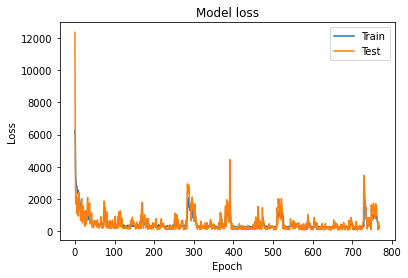

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# train_y = np.array([train_input_sales_data[i][3][0] for i in range(train_input_sales_data.shape[0])])
# yhat_future  = np.array([yhat[i][3][0] for i in range(yhat.shape[0])])
# yhat_train
# yhat_test


yhat_train_array = np.array([yhat_train[i][0][0] for i in range(yhat_train.shape[0])])
yhat_test_array = np.array([yhat_test[i][0][0] for i in range(yhat_test.shape[0])])

Y_final_train_array = np.array([Y_final_train[i][0][0] for i in range(Y_final_train.shape[0])])
Y_final_test_array = np.array([Y_final_test[i][0][0] for i in range(Y_final_test.shape[0])])

# test_yhat_future  = np.array([yhat[i][0][0] for i in range(yhat.shape[0])])
len(yhat_train_array), len(yhat_test_array)

(1578, 665)

In [ ]:
Y_final_train_array

array([ 5521.049805,  5485.799805,  5482.799805, ..., 10342.29981 ,
       10348.75    , 10389.7002  ])

In [ ]:
# Y_final_test

# Model Results

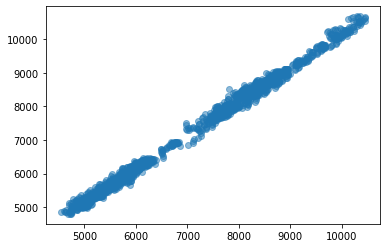

Test R-Square : 0.983802894652543
Test MAE      : 168.5519458586027
Test Mean     : 7195.10877788213
Test MAPE     : 0.023425906551508138
Test RMSE     : 199.07643822262884


In [ ]:
plt.scatter(Y_final_train_array,yhat_train_array,alpha=0.5)
# plt.xlim(0,400)
# plt.ylim(0,400)
plt.show()
print('Test R-Square :',r2_score(Y_final_train_array, yhat_train_array))
mae_test = mean_absolute_error(Y_final_train_array,yhat_train_array)
rmse_test = sqrt(mean_squared_error(Y_final_train_array, yhat_train_array))
print('Test MAE      :',mae_test)
print('Test Mean     :',Y_final_train.mean())
print('Test MAPE     :',mae_test/Y_final_train.mean())
print('Test RMSE     :',rmse_test)

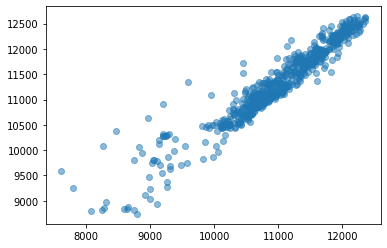

Test R-Square : 0.7324415716953829
Test MAE      : 342.4187864366545
Test Mean     : 10960.299038445111
Test MAPE     : 0.031241737587228452
Test RMSE     : 419.6366185415609


In [ ]:
plt.scatter(Y_final_test_array,yhat_test_array,alpha=0.5)
# plt.xlim(0,400)
# plt.ylim(0,400)
plt.show()
print('Test R-Square :',r2_score(Y_final_test_array, yhat_test_array))
mae_test = mean_absolute_error(Y_final_test_array,yhat_test_array)
rmse_test = sqrt(mean_squared_error(Y_final_test_array, yhat_test_array))
print('Test MAE      :',mae_test)
print('Test Mean     :',Y_final_test.mean())
print('Test MAPE     :',mae_test/Y_final_test.mean())
print('Test RMSE     :',rmse_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Y['Close']

0        5565.049805
1        5486.149902
2        5544.750000
3        5499.000000
4        5438.950195
            ...     
2278    11355.049810
2279    11317.349610
2280    11278.000000
2281    11449.250000
2282    11464.450200
Name: Close, Length: 2283, dtype: float64

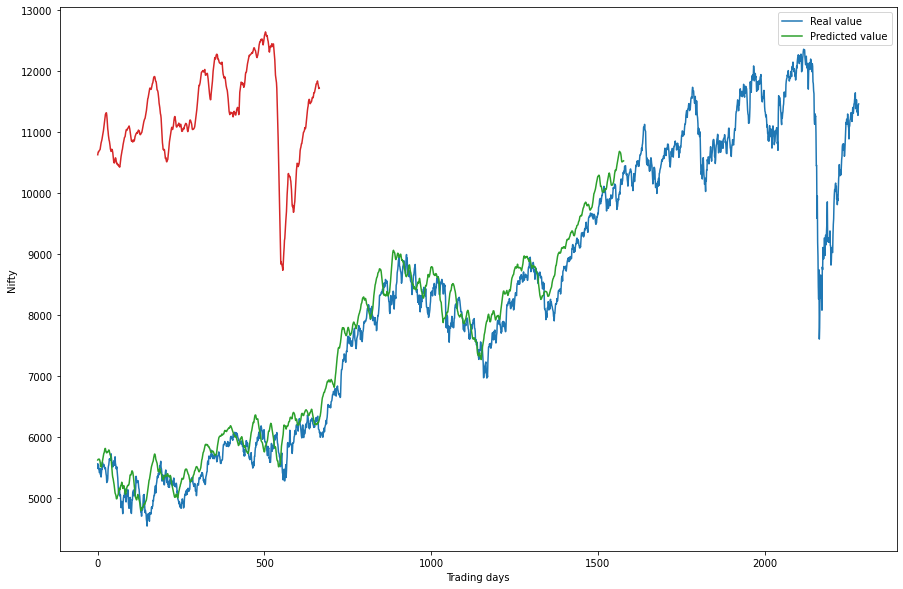

In [ ]:
# Y_final_test, yhat_test_array

plt.figure(figsize=(15,10))
plt.plot(list(Y['Close']),alpha=1,color ='tab:blue')
# plt.plot(Y_final_test_array,alpha=1,color ='tab:blue')
plt.plot(yhat_train_array,alpha=1,color ='tab:green')
plt.plot(yhat_test_array,alpha=1,color ='tab:red')
plt.ylabel('Nifty')
plt.xlabel('Trading days')
plt.legend(["Real value","Predicted value"])

In [ ]:
# train_zero = np.zeros(len(yhat_test_array))
# test_zero = np.zeros(len(yhat_train_array))

# train_output = np.concatenate([yhat_train_array, train_zero])
# test_output = np.concatenate([test_zero, yhat_test_array])

# len(yhat_train_array), len(yhat_test_array), len(train_zero), len(test_zero), len(train_output), len(test_output)

In [ ]:
1578+ 665

2243

In [ ]:
len(Y['Close'])

2283

In [ ]:
nifty_df_output_Train = pd.DataFrame(index = range(len(Y_final_train_array)), columns = ['Actual_Train', 'Predicted_Y_Train'])
nifty_df_output_Test = pd.DataFrame(index = range(len(Y_final_test_array)), columns = ['Actual_Test', 'Predicted_Y_Test'])
nifty_df_output_Train['Actual_Train'] = Y_final_train_array
nifty_df_output_Train['Predicted_Y_Train'] = yhat_train_array
nifty_df_output_Test['Actual_Test'] = Y_final_test_array
nifty_df_output_Test['Predicted_Y_Test'] = yhat_test_array

nifty_df_output_Test.head(2)

,Actual_Test,Predicted_Y_Test
0,10531.50,10632.499023
1,10490.75,10666.411133


In [ ]:
nifty_df_output_Test.to_csv('nifty_df_output_Test.csv', index = False)
nifty_df_output_Train.to_csv('nifty_df_output_Train.csv', index = False)

In [ ]:
nifty_df_output['Actual'] = list(Y['Close'])
nifty_df_output['Predicted_Y_Train'] = list(Y['Close'])


NameError: ignored

In [ ]:
list(Y['Close'])

In [ ]:
test_yhat_future

In [ ]:
index1=range(0,2261)

In [ ]:
niftyexcel=pd.DataFrame(test_yhat_future,columns=["predicted"])

In [ ]:
yhat=yhat.reshape(2263,-1)

In [ ]:
niftyexcel1=pd.DataFrame(test_y,columns=["real"])

In [ ]:
niftyexcel

In [ ]:
niftyexcel1

In [ ]:
sim=pd.concat([niftyexcel,niftyexcel1],axis=1)

In [ ]:
sim.to_excel("sim.xlsx")

In [ ]:
nifty.to_excel("excel.xlsx")

In [ ]:
yhat

In [ ]:
ss=pd.DataFrame(yhat)

In [ ]:
ss.to_excel("ss.xlsx")